In [1]:
import numpy as np
NSTEPS = 5
np.arange(1,NSTEPS+1,1)[::-1]

array([5, 4, 3, 2, 1])

In [ ]:
sample = [self.transitions[-NSTEPS+1:]]# tranition[-5], tranition[-4], tranition[-3], tranition[-2], tranition[-1]
for i in np.arange(1, NSTEPS+1, 1)[::-1]:
    sample.append(self.transitions[-i])

In [3]:
transitions = [1, 2, 3, 4, 5]
print(transitions[-3:])

[3, 4, 5]


/home/gromovl/Programming/ml_final-project/mle-ss23_final-project/agent_code/sarsa_agent


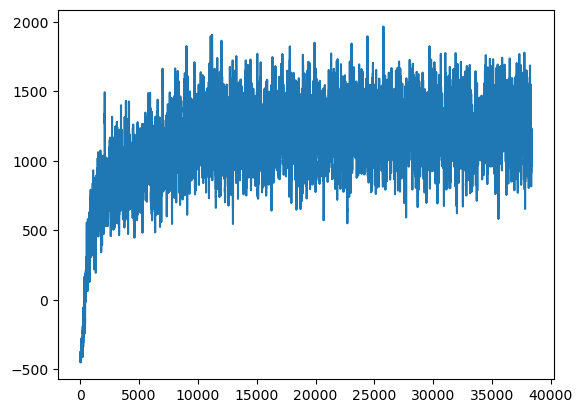

In [16]:
import os
import pickle

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import sys
from helper import Stats

#stat_dir = "agent_code/sarsa_agent/stats/2023-09-15_18-10-39-491223.pkl"


here = os.getcwd().replace('\\','/')
print(here)

sys.path.append('/'.join(here.split('/')[:-2]))
filename = 'stats/2023-09-15_18-10-39-491223.pkl'
stat_dir = '/'.join((here, filename))


with open(stat_dir, "rb") as file:
    stats = pickle.load(file)

round_rewards = pd.DataFrame(stats.round_reward_history)
round_means = round_rewards.rolling(min_periods=None, window=20).mean()

plt.plot(round_means)
#conv = np.convolve(round_rewards.to_numpy().squeeze(), np.ones(20)/20, mode='valid')
#plt.plot(conv)


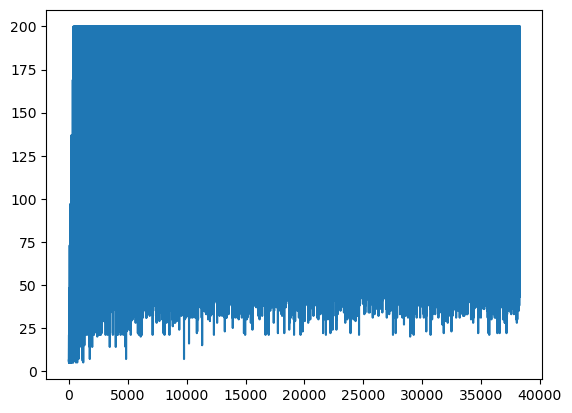

In [11]:
round_length = stats.round_length_history
plt.plot(round_length)

In [8]:
import torch

table_stats = stats.table_exploration
explored_states = (table_stats > 0)
n_explored_states = torch.sum(explored_states)
print(f"Explored state ratio: {n_explored_states}/{table_stats.numel()} = {torch.sum(table_stats > 0) / table_stats.numel():.2%}")

Explored state ratio: 9014/38400 = 23.47%


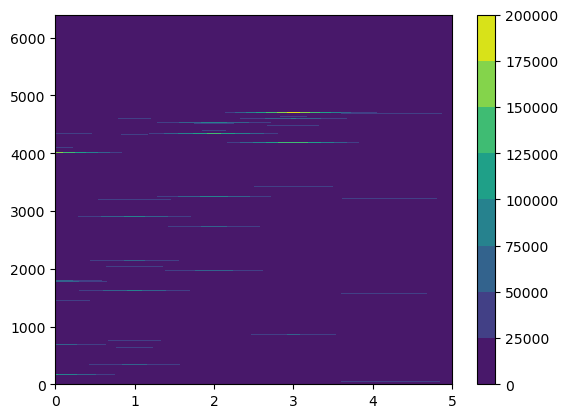

In [9]:
from matplotlib import pyplot as plt
import numpy as np

state_action_table = table_stats.reshape(-1, 6)
s = np.arange(0, state_action_table.shape[0])
a = np.arange(0, state_action_table.shape[1])
S, A = np.meshgrid(a, s)
plt.contourf(S, A, state_action_table)
plt.colorbar()

plt.show()